In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pydataset import data
from numpy import random
import seaborn as sns
import pandas as pd

np.random.seed(123)

# 1.  A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

Text(0.5, 0, 'Cars in drive thru')

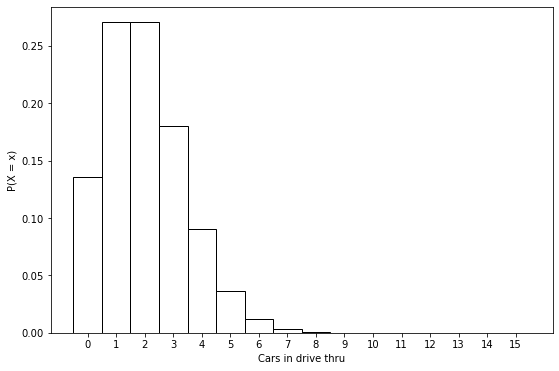

In [26]:
#1
x = range(16)
y = stats.poisson(2).pmf(x)

plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('P(X = x)')
plt.xlabel('Cars in drive thru')

## What is the probability that no cars drive up in the noon hour?


In [22]:
one_a = stats.poisson(2).pmf(0)
one_a

0.1353352832366127

## What is the probability that 3 or more cars come through the drive through?


In [60]:
one_b = stats.poisson(2).sf(2)
one_b

0.32332358381693654

## How likely is it that the drive through gets at least 1 car?


In [62]:
one_c = stats.poisson(2).sf(0)
one_c

0.8646647167633873

## Now let's redo this question using a simulation rather than a probability distribution. 



In [42]:
poisson_sample = random.poisson(lam = 2, size = 10_000)

<AxesSubplot:>

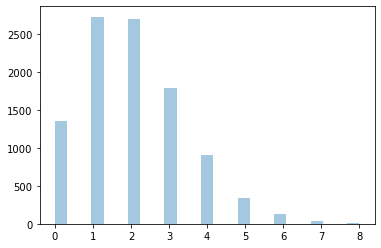

In [48]:

sns.distplot(poisson_sample, kde = False, bins = 25)

In [52]:
cars_at_noon = pd.DataFrame(poisson_sample)
cars_at_noon

,0
0,2
1,4
2,2
3,2
4,2
...,...
9995,2
9996,5
9997,1
9998,2


In [55]:
no_cars = cars_at_noon[0] == 0

In [56]:
no_cars.mean()

0.1353

### There is a 0.1353 chance that no cars drive up at noon. 

In [57]:
three_or_more_cars = cars_at_noon[0] >= 3

In [58]:
three_or_more_cars.mean()

0.322

### There is a 0.322 chance that three or more cars drive up at noon. 

In [63]:
at_least_one_car = cars_at_noon[0] > 0

In [64]:
at_least_one_car.mean()

0.8647

### There is a 0.8647 chance that at least one car will show up at noon. 

# 2

# Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. What grade point average is required to be in the top 5% of the graduating class?

In [4]:
μ = 3.0
σ = .3

gpa = stats.norm(μ, σ)
top_5_percent_cutoff = gpa.ppf(.95)
round(top_5_percent_cutoff, 2)

3.49

## What GPA constitutes the bottom 15% of the class?


In [32]:
bottom_15_percent_cutoff = gpa.ppf(.15)
round(bottom_15_percent_cutoff, 2)

2.69

## An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [35]:
third_decile_upper = gpa.isf(0.7)
third_decile_lower = gpa.isf(0.8)

In [39]:
round(third_decile_lower, 2)

2.75

In [40]:
round(third_decile_upper, 2)

2.84

### A 2.8 GPA would qualify for this scholarship.

## If I have a GPA of 3.5, what percentile am I in?

In [51]:
percentile_gpa = round(gpa.cdf(3.5)*100, 2)

In [52]:
percentile_gpa

95.22

### Now lets solve exercise 2 again using simulations. 

In [5]:
gpa_sample = random.normal(μ, σ, size = 10_000)

In [89]:
gpa_df = pd.DataFrame(gpa_sample)
gpa_df

,0
0,2.627709
1,2.906116
2,2.745316
3,3.713386
4,3.197250
...,...
9995,2.715824
9996,2.922417
9997,2.579148
9998,3.313362


In [81]:
gpa_df[0].quantile(0.95)

3.496594388783535

In [82]:
gpa_df[0].quantile(0.15)

2.692302745255947

In [83]:
gpa_df[0].quantile(0.2)

2.7490893009628503

In [84]:
gpa_df[0].quantile(0.3)

2.8429445488108454

In [90]:
gpa_df['Percentile Rank'] = gpa_df[0].rank(pct = True)
gpa_df

,0,Percentile Rank
0,2.627709,0.1051
1,2.906116,0.3764
2,2.745316,0.1998
3,3.713386,0.9903
4,3.197250,0.7419
...,...,...
9995,2.715824,0.1727
9996,2.922417,0.3951
9997,2.579148,0.0769
9998,3.313362,0.8479


In [95]:
gpa_three_five = round(gpa_df[0], 2) == 3.50

In [98]:
gpa_df['Percentile Rank'][gpa_three_five].mean()

0.9509499999999999

# 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [106]:
clicks = stats.binom(4325, .02)
clicks.sf(96)

0.139266219610741

### Now let's solve number 3 using a simulation. 

In [107]:
click_sample = random.binomial(4325, 0.02, size = 100_000)

In [108]:
click_pd = pd.DataFrame(click_sample)
click_pd

,0
0,91
1,91
2,92
3,73
4,91
...,...
99995,90
99996,90
99997,83
99998,100


In [109]:
ninety_seven_or_more = click_pd[0] >= 97
ninety_seven_or_more.mean()

0.13862

In [54]:
homework = stats.binom(60, 0.99)

In [55]:
homework.cdf(59)

0.4528433576092388

In [113]:
homework_sample = random.binomial(60, 0.01, 100_000)

In [114]:
homework_pd = pd.DataFrame(homework_sample)

In [115]:
homework_pd

,0
0,1
1,0
2,2
3,0
4,1
...,...
99995,1
99996,1
99997,0
99998,1


In [116]:
at_least_one = homework_pd[0] > 0
at_least_one.mean()

0.45105

In [3]:
breakroom_one_day = stats.binom(66*0.9, .03)

### The probability that at least one student cleans up the breakroom on one day. 

In [4]:
breakroom_one_day.sf(0)

0.8342199288437355

In [5]:
breakroom_two_day = stats.binom((66*2)*0.9, 0.03)

### Chances the breakroom goes two days without being cleaned up. 

In [6]:
breakroom_two_day.cdf(0)

0.027483031992576134

In [8]:
breakroom_week = stats.binom((66*7)*0.9, 0.03)

### Chances the room goes one week without being cleaned up.

In [9]:
breakroom_week.cdf(0)

3.237946886079981e-06

## Now let's solve the same problem using simulations instead of distributions.

In [10]:
breakroom_sample_one_day = random.binomial(66*0.9, .03, 100_000)

In [11]:
breakroom_one_df = pd.DataFrame(breakroom_sample_one_day)
breakroom_one_df

,0
0,2
1,1
2,1
3,2
4,2
...,...
99995,1
99996,2
99997,3
99998,2


In [12]:
at_least_one_cleans = breakroom_one_df[0] > 0
at_least_one_cleans.mean()

0.83435

In [13]:
breakroom_sample_two_day = random.binomial((66*2)*0.9, 0.03, 100_000)

In [14]:
breakroom_two_df = pd.DataFrame(breakroom_sample_two_day)
breakroom_two_df

,0
0,2
1,2
2,1
3,4
4,2
...,...
99995,4
99996,1
99997,1
99998,3


In [15]:
two_days_nobody_cleans = breakroom_two_df[0] == 0
two_days_nobody_cleans.mean()

0.02746

In [16]:
breakroom_sample_one_week = random.binomial((66*7)*0.9, 0.03, 1_000_000)

In [17]:
breakroom_one_week_df = pd.DataFrame(breakroom_sample_one_week)
breakroom_one_week_df

,0
0,8
1,10
2,20
3,15
4,12
...,...
999995,12
999996,15
999997,15
999998,10


In [19]:
one_week_nobody_cleans = breakroom_one_week_df[0] == 0
one_week_nobody_cleans.mean()

1e-06

# 6. 
### You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

### 2x + 10 + 15 = 60 
### 2x + 25 = 60
### 2x = 60 - 25 
### 2x = 35
### x = 35 / 2 
### x = 17.5
### There can be a maximum of 16 customers in line, because it also takes us two minutes to order. 

In [27]:
μ = 15.0
σ = 3.0
time_per_customer = 2
wait_time_for_food = 10

customers_in_line = stats.norm(μ, σ)

In [20]:
customers_in_line.cdf(16.5)

0.6914624612740131

## There is a 0.63 chance we will have enough time to eat our lunch. 

### We can also solve the problem this way:

In [28]:
new_μ = (μ * time_per_customer) + wait_time_for_food + time_per_customer

In [29]:
time_wait = stats.norm(new_μ, (σ*2))

In [30]:
time_wait.cdf(45)

0.6914624612740131

### Let's solve the same problem using sampling. 

In [23]:
customer_sample = random.normal(μ, σ, 100_000)

In [24]:
customers_df = pd.DataFrame(customer_sample)
customers_df

,0
0,11.277091
1,14.061160
2,12.453160
3,22.133858
4,16.972502
...,...
99995,19.890750
99996,17.183311
99997,17.955182
99998,12.150128


In [25]:
sixteen_or_less = customers_df[0] <= 16.5
sixteen_or_less.mean()

0.69147

# 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. 

In [4]:
from env import host, user, password
def get_db_url(host, user, password, database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [5]:
employees_url = get_db_url(host, user, password, "employees")


In [6]:
sql = '''
SELECT *
FROM salaries
WHERE to_date >= NOW()
'''

In [7]:
employees = pd.read_sql(sql, employees_url)

In [8]:
employees

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [9]:
mean_salary = employees['salary'].mean()

In [10]:
std_salary = employees['salary'].std()

In [11]:
salaries_normal = stats.norm(mean_salary, std_salary)

### What percent of employees earn less than 60,000?

In [50]:
salaries_normal.cdf(60_000) - salaries_normal.pdf(60_000)

0.24383930961304945

### What percent of employees earn more than 95,000?

In [51]:
salaries_normal.sf(95_000)

0.09208819199804053

### What percent of employees earn between 65,000 and 80,000?

In [14]:
salaries_normal.sf(65_000) - salaries_normal.sf(80_000) - salaries_normal.pdf(80_000)

0.3350398493031135

### What do the top 5% of employees make?

In [12]:
round(salaries_normal.isf(0.05),2)

100484.64

### Now we will solve the same problem using the actual data, rather than distributions.

### What percent of employees earn less than 60,000?

In [54]:
less_than_sixty = employees['salary'] < 60_000

In [55]:
less_than_sixty.mean()

0.2705727041028802

### What percent of employees earn more than 95,000?

In [56]:
more_than_ninetyfive = employees['salary'] > 95_000

In [57]:
more_than_ninetyfive.mean()

0.1086272092752078

### What percent of employees earn between 65,000 and 80,000?

In [64]:
between_eighty_and_sixtyfive = (employees['salary'] < 80_000) & (employees['salary'] > 65_000)

In [65]:
between_eighty_and_sixtyfive.mean()

0.325107028035515

### What do the top 5% of employees make?

In [13]:
round(employees['salary'].quantile(.95), 2)

104225.85